# Comcast stock price analysis using Bollinger Bands

In [2]:
import pandas as pd
import fix_yahoo_finance as fyf
from matplotlib import pyplot as plt
from pandas_datareader import data as pdr
fyf.pdr_override()
%matplotlib inline

In [3]:
# reads in Comcast stock to df
df = pdr.get_data_yahoo('CMCSA', start='2017-01-01')

[*********************100%***********************]  1 of 1 downloaded


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-28,34.860001,35.360001,34.180000,34.349998,34.160000,16231300
2018-12-31,34.290001,34.599998,33.299999,34.049999,34.049999,21613200
2019-01-02,33.490002,34.450001,33.419998,34.369999,34.369999,16970400
2019-01-03,34.330002,35.330002,34.130001,34.639999,34.639999,28750400
2019-01-04,35.029999,35.840000,34.860001,35.810001,35.810001,22843800


In [5]:
# Add columns "20 day moving average", "20 day standard deviation", "STD upper band", "STD low band"
df['20 ma'] = df['Adj Close'].rolling(20).mean()
df['20 sd'] = df['Adj Close'].rolling(20).std()
df['upper'] = df['20 ma'] + (df['20 sd'] * 2)
df['lower'] = df['20 ma'] - (df['20 sd'] * 2)

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,20 ma,20 sd,upper,lower
Date,,,,,,,,,,
2017-01-03,34.834999,34.945000,34.115002,34.525002,33.212471,23670400,NaN,NaN,NaN,NaN
2017-01-04,34.755001,35.130001,34.590000,34.935001,33.606884,22010800,NaN,NaN,NaN,NaN
2017-01-05,34.794998,35.130001,34.700001,35.075001,33.741566,16986000,NaN,NaN,NaN,NaN
2017-01-06,35.105000,35.270000,34.910000,35.134998,33.799274,13528000,NaN,NaN,NaN,NaN
2017-01-09,35.070000,35.480000,35.025002,35.415001,34.068638,18135400,NaN,NaN,NaN,NaN


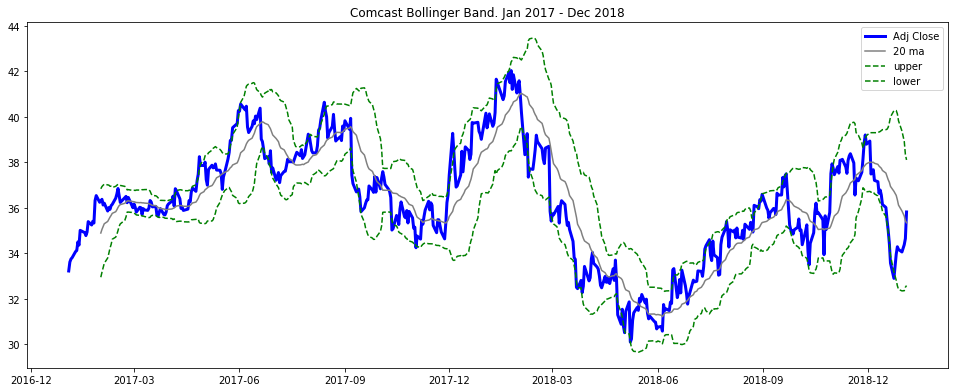

In [7]:
fig = plt.figure(figsize=(16,6))
axis = fig.add_axes([0.1,0.1,0.8,0.8])
axis.plot(df['Adj Close'],c='b',lw=3)
axis.plot(df['20 ma'],c='gray')
axis.plot(df['upper'],c='g',ls='--')
axis.plot(df['lower'],c='g',ls='--')
plt.title('Comcast Bollinger Band. Jan 2017 - Dec 2018')
plt.legend();